## Trabajo práctico n°1

#### Visión por computadora

#### Enunciado
▪ Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.


---

▪ Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes
separadas.


---

In [23]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np # type: ignore
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


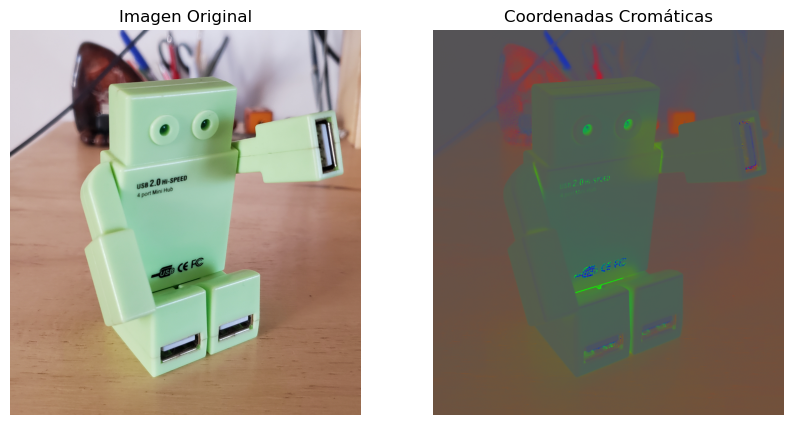

In [35]:
# Cargar imagen en formato BGR
img = cv.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_1.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# Convertir a float para evitar truncamientos
img_float = img.astype(np.float32)

# Calcular la suma de los canales por píxel
sum_channels = np.sum(img_float, axis=2, keepdims=True) + 1e-6  # para evitar división por cero


# Coordenadas cromáticas: r, g (podrías calcular b = 1 - r - g si lo necesitas)
r = img_float[:, :, 0:1] / sum_channels
g = img_float[:, :, 1:2] / sum_channels


# Unir los canales r, g, b=1-r-g para visualizar (opcional)
b = 1 - r - g
img_chromatic = np.concatenate((r, g, b), axis=2)

# Mostrar la imagen original y la de coordenadas cromáticas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(img.astype(np.uint8))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Coordenadas Cromáticas')
plt.imshow(img_chromatic)
plt.axis('off')

plt.show()




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


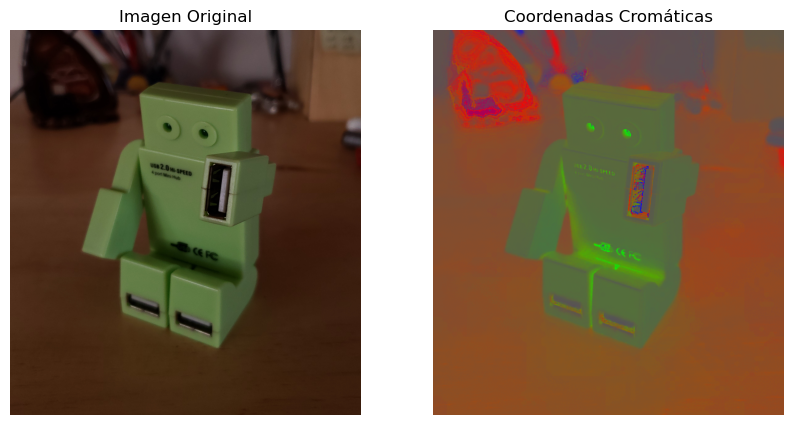

In [37]:
# Cargar imagen en formato BGR
img = cv.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_2.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# Convertir a float para evitar truncamientos
img_float = img.astype(np.float32)

# Calcular la suma de los canales por píxel
sum_channels = np.sum(img_float, axis=2, keepdims=True) + 1e-6  # para evitar división por cero


# Coordenadas cromáticas: r, g (podrías calcular b = 1 - r - g si lo necesitas)
r = img_float[:, :, 0:1] / sum_channels
g = img_float[:, :, 1:2] / sum_channels


# Unir los canales r, g, b=1-r-g para visualizar (opcional)
b = 1 - r - g
img_chromatic = np.concatenate((r, g, b), axis=2)

# Mostrar la imagen original y la de coordenadas cromáticas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(img.astype(np.uint8))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Coordenadas Cromáticas')
plt.imshow(img_chromatic)
plt.axis('off')

plt.show()




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


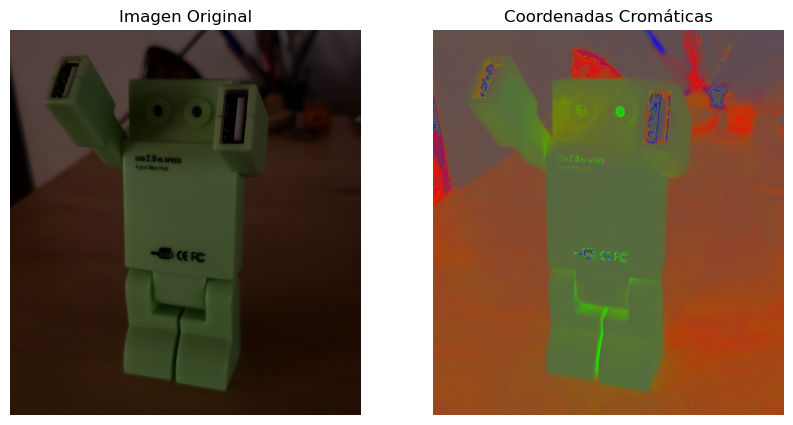

In [39]:
# Cargar imagen en formato BGR
img = cv.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_3.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# Convertir a float para evitar truncamientos
img_float = img.astype(np.float32)

# Calcular la suma de los canales por píxel
sum_channels = np.sum(img_float, axis=2, keepdims=True) + 1e-6  # para evitar división por cero


# Coordenadas cromáticas: r, g (podrías calcular b = 1 - r - g si lo necesitas)
r = img_float[:, :, 0:1] / sum_channels
g = img_float[:, :, 1:2] / sum_channels


# Unir los canales r, g, b=1-r-g para visualizar (opcional)
b = 1 - r - g
img_chromatic = np.concatenate((r, g, b), axis=2)

# Mostrar la imagen original y la de coordenadas cromáticas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(img.astype(np.uint8))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Coordenadas Cromáticas')
plt.imshow(img_chromatic)
plt.axis('off')

plt.show()




Se esta normalizando el color por cada píxel para eliminar efectos de intensidad y sombra.
Se conserva información puramente cromática, útil para clasificación de colores, segmentación, etc.

2. White Patch

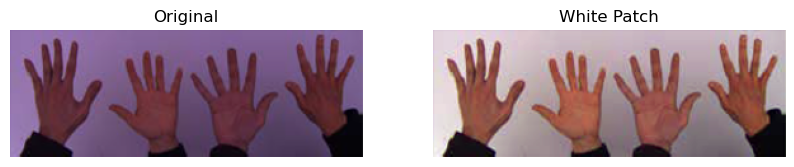

In [49]:
# Cargar imagen
img_bgr = cv.imread('./Material_TPs/TP1/white_patch/test_blue.png')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

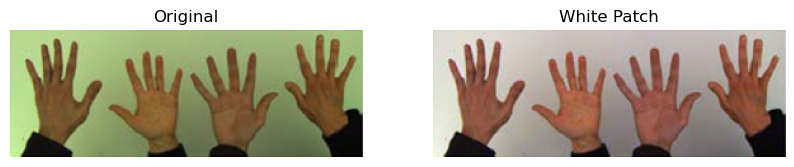

In [51]:
# Cargar imagen
img_bgr = cv.imread('./Material_TPs/TP1/white_patch/test_green.png')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

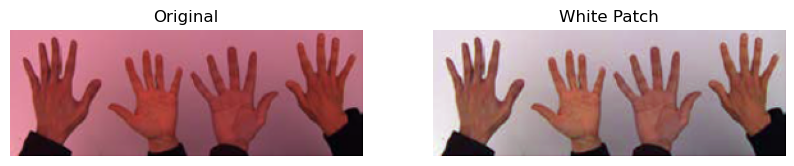

In [53]:
# Cargar imagen
img_bgr = cv.imread('./Material_TPs/TP1/white_patch/test_red.png')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()

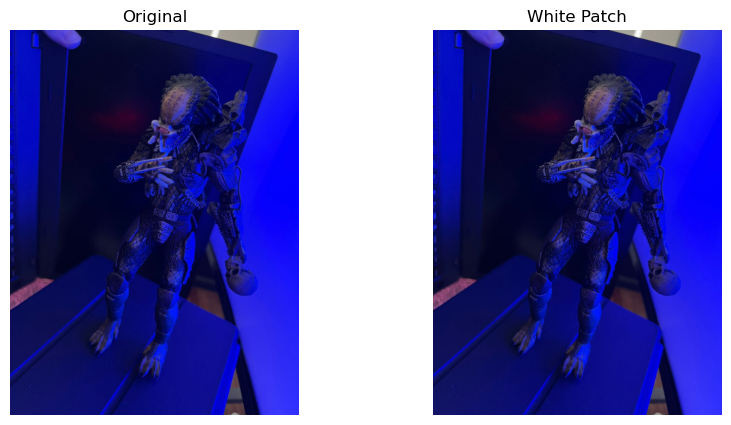

In [57]:
# Cargar imagen
img_bgr = cv.imread('./Material_TPs/TP1/white_patch/wp_blue.jpg')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()


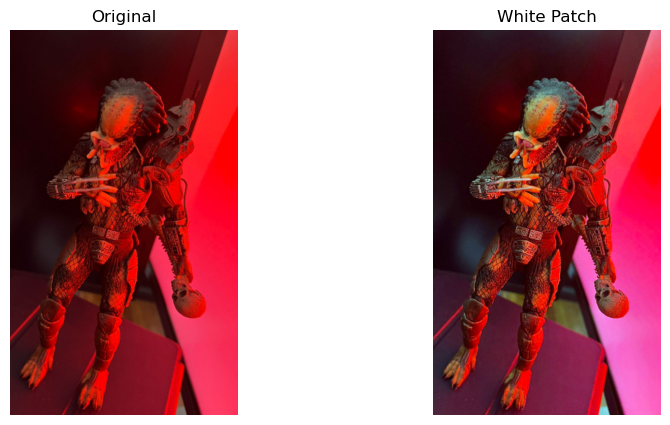

In [63]:
# Cargar imagen
img_bgr = cv.imread('./Material_TPs/TP1/white_patch/wp_red.png')  # cambia esto por el path real
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Convertir a float para evitar truncamientos
img_float = img_rgb.astype(np.float32)

# Aplicar White Patch por canal
max_vals = np.max(np.max(img_float, axis=0), axis=0)  # valores máximos por canal R, G, B
white_patch = img_float / (max_vals + 1e-6)  # evitar división por cero

# Escalar a [0,255] y convertir a uint8
white_patch = np.clip(white_patch * 255, 0, 255).astype(np.uint8)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('White Patch')
plt.imshow(white_patch)
plt.axis('off')

plt.show()